In [50]:
## Library
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model

import matplotlib.pyplot as plt
import random

In [77]:
## Load Mnist Data
(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(f'Train Shape: {X_train.shape}')
print(f'Test Shape: {X_test.shape}')

Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


## Show Data

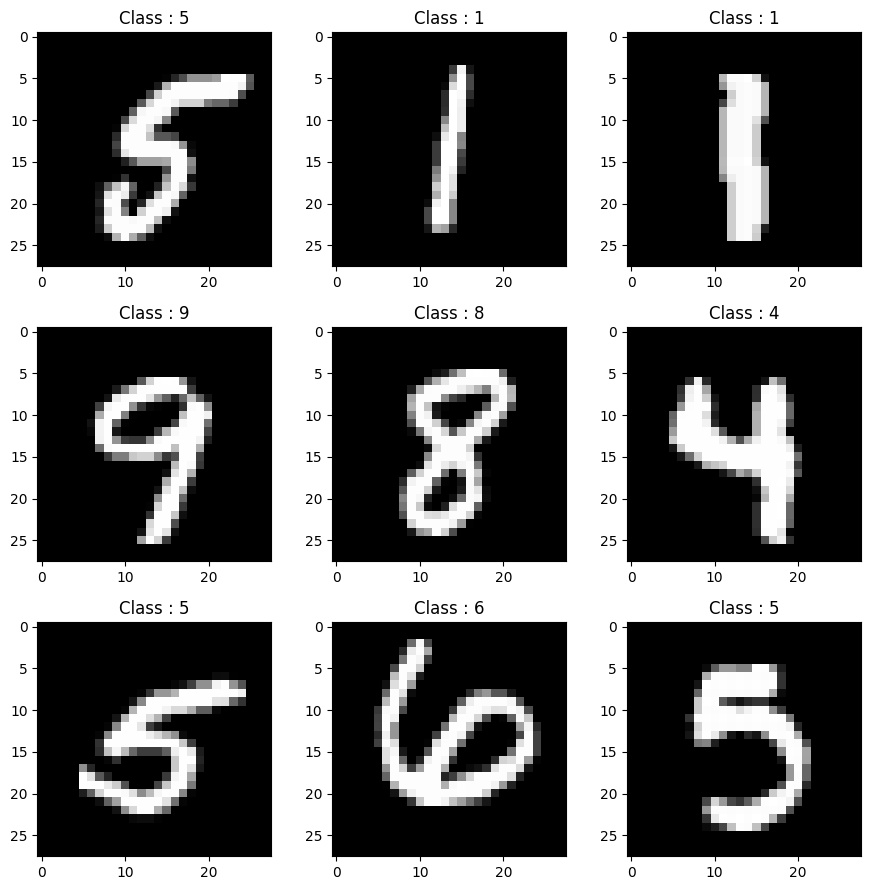

In [78]:

plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    ## generate random number
    num = random.randint(0, len(X_train))
    ## show gray image as Mnist data
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    ## Class image as Mnist data
    plt.title("Class : " + str(y_train[num]))

plt.tight_layout()

## Normalize Data

In [53]:
## reshape Data (28,28) => (28,28,1)
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

print(f'Train Shape: {X_train.shape}')
print(f'Test Shape: {X_test.shape}')

In [55]:
## Categorical(one_hot) on Label
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [56]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train /= 255
X_test /= 255

## Model

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_9 (Flatten)         (None, 9216)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               2359552   
                                                      

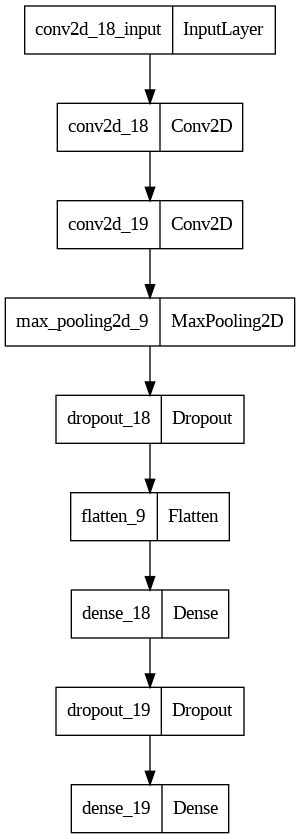

In [67]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

## information model 
model.summary()

## show model
plot_model(model)

In [68]:
## complie model 
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
## fit data on model
hist = model.fit(X_train, y_train,batch_size=64,epochs=5,validation_data=(X_test, y_test))
print("The model has successfully trained")

Epoch 1/5
938/938 [==============================] - 9s 8ms/step - loss: 0.1684 - accuracy: 0.9487 - val_loss: 0.0459 - val_accuracy: 0.9856
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0604 - accuracy: 0.9816 - val_loss: 0.0368 - val_accuracy: 0.9878
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0283 - val_accuracy: 0.9911
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0287 - val_accuracy: 0.9902
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0289 - val_accuracy: 0.9910
The model has successfully trained


In [70]:
print("Test Accuracy:",hist.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ", 
      max(hist.history['val_accuracy']))


Test Accuracy: 0.9909999966621399 
Maximum Test Acuracy During Training:  0.991100013256073


In [72]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0289 - accuracy: 0.9910
Test loss: 0.028915872797369957
Test accuracy: 0.9909999966621399


In [74]:
## save Model as (h5) file
model.save('mnist.h5')